In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
# Performe API calls

def get_current_weather(city, apikey):
    url = "http://api.openweathermap.org/data/2.5/weather?"
    payload  = {"appid": api_key,
                "q": city,
                "units": "imperial"}
    r = requests.get(url, params=payload)
    if r.status_code == 200:
        return r.json()
    else:
        return None

get_current_weather("austin", api_key)

{'coord': {'lon': -97.74, 'lat': 30.27},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 57.25,
  'feels_like': 52.38,
  'temp_min': 50,
  'temp_max': 63,
  'pressure': 1022,
  'humidity': 62},
 'visibility': 16093,
 'wind': {'speed': 6.33, 'deg': 201},
 'clouds': {'all': 1},
 'dt': 1578326901,
 'sys': {'type': 1,
  'id': 3344,
  'country': 'US',
  'sunrise': 1578317292,
  'sunset': 1578354281},
 'timezone': -21600,
 'id': 4671654,
 'name': 'Austin',
 'cod': 200}

In [4]:
# Log of each city

data = []
city_num = 1
for city in cities:
    result = get_current_weather(city, api_key)
    if result:
        print ("City " + str(city_num) + ": " + (city))
        data.append(result)
        city_num += 1

City 1: kaitangata
City 2: banyuwangi
City 3: aklavik
City 4: rikitea
City 5: clocolan
City 6: ushuaia
City 7: alofi
City 8: hermanus
City 9: jamestown
City 10: kavaratti
City 11: punta arenas
City 12: shancheng
City 13: muzhi
City 14: ustyuzhna
City 15: bethel
City 16: vaini
City 17: rawson
City 18: linjiang
City 19: georgetown
City 20: port elizabeth
City 21: samarai
City 22: chokurdakh
City 23: jacareacanga
City 24: busselton
City 25: mataura
City 26: hualmay
City 27: zeerust
City 28: constantine
City 29: sabattus
City 30: kodiak
City 31: anloga
City 32: nueve de julio
City 33: airai
City 34: comarapa
City 35: the valley
City 36: petropavlovsk-kamchatskiy
City 37: hay river
City 38: carnarvon
City 39: marseille
City 40: sula
City 41: kilindoni
City 42: butaritari
City 43: hilo
City 44: ponta do sol
City 45: barrow
City 46: qaanaaq
City 47: kapaa
City 48: bredasdorp
City 49: nikolskoye
City 50: onverwacht
City 51: meulaboh
City 52: bluff
City 53: chuy
City 54: anadyr
City 55: san vic

In [5]:
# Create Pandas DataFrame

all_cities = []

for city in cities:
    result = get_current_weather(city, api_key)
    if result:
        all_cities.append(result)

df = pd.DataFrame([{"City Name": d["name"],
                    "Country": d["sys"]["country"],
                    "Date (Unix Time)": d["dt"],
                    "Longitude": d["coord"]["lon"],
                    "Latitude": d["coord"]["lat"],
                    "Max Temperature (F)": d["main"]["temp_max"],
                    "Humidity (%)": d["main"]["humidity"],
                    "Cloudiness (%)": d["clouds"]["all"],
                    "Wind Speed (mph)" : d["wind"]["speed"]} for d in all_cities])
df

,City Name,Country,Date (Unix Time),Longitude,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Kaitangata,NZ,1578326811,169.85,-46.28,51.01,84,100,4.00
1,Banyuwangi,ID,1578326986,114.37,-8.21,80.28,82,100,5.39
2,Aklavik,CA,1578326986,-135.01,68.22,-25.60,74,40,4.70
3,Rikitea,PF,1578326986,-134.97,-23.12,75.67,74,69,13.87
4,Clocolan,ZA,1578326987,27.57,-28.91,85.62,22,71,5.46
...,...,...,...,...,...,...,...,...,...
529,Salekhard,RU,1578327116,66.62,66.54,4.78,86,52,10.00
530,Sonoita,US,1578327117,-110.66,31.68,48.00,42,1,10.29
531,Kasongo-Lunda,CD,1578327084,16.82,-6.48,85.98,51,82,2.80
532,Newport,GB,1578327117,-3.00,51.59,51.01,93,75,18.34


In [6]:
# Save as a CSV file

df.to_csv("current_weather.csv", index = False)

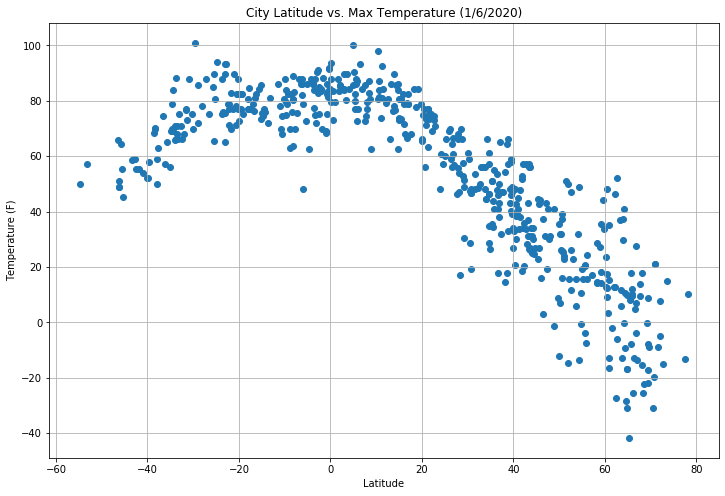

In [8]:
# Latitude vs. Temperature Plot

x = df["Latitude"]
y = df["Max Temperature (F)"]
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.title("City Latitude vs. Max Temperature (1/6/2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("latitude_vs_temperature.png")

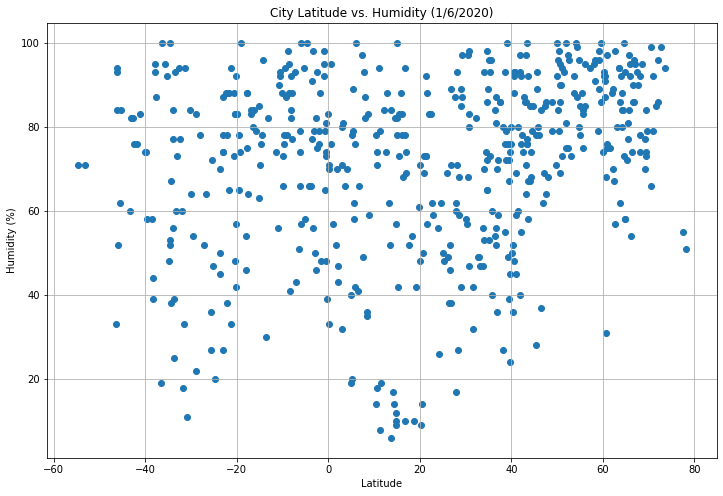

In [9]:
# Latitude vs. Humidity Plot

x = df["Latitude"]
y = df["Humidity (%)"]
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.title("City Latitude vs. Humidity (1/6/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("latitude_vs_humidity.png")

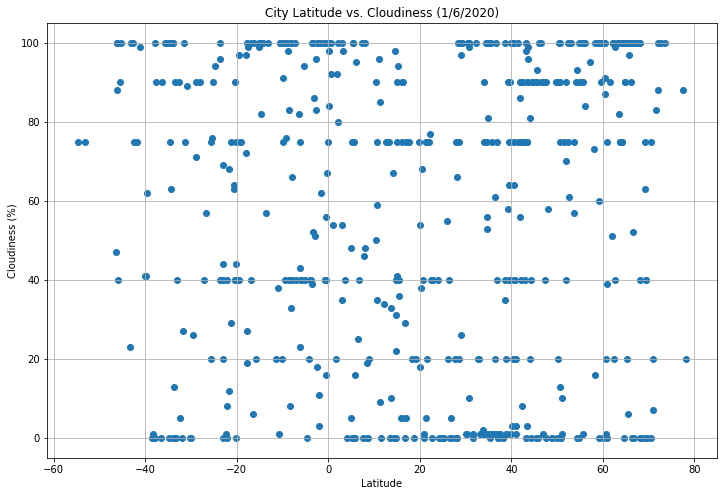

In [10]:
# Latitude vs. Cloudiness Plot

x = df["Latitude"]
y = df["Cloudiness (%)"]
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.title("City Latitude vs. Cloudiness (1/6/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("latitude_vs_cloudiness.png")

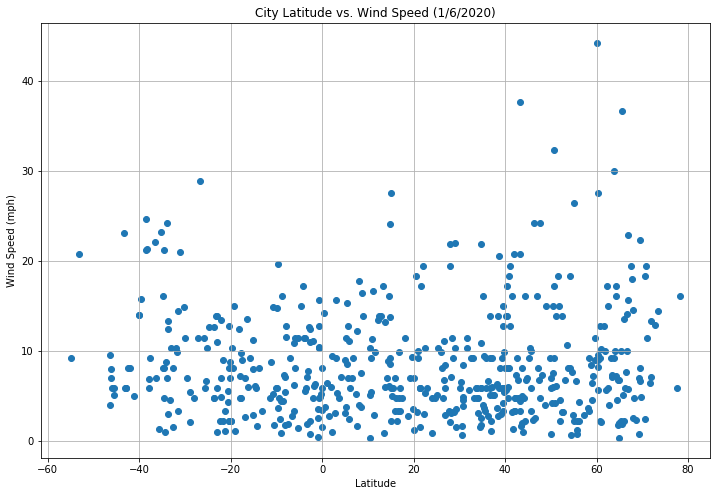

In [11]:
# Latitude vs. Wind Speed Plot

x = df["Latitude"]
y = df["Wind Speed (mph)"]
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.title("City Latitude vs. Wind Speed (1/6/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("latitude_vs_wind.png")

In [ ]:
### Three Observations 
# 1. The maximum temperature of cities around the world tends to be higher the closer they are to the equator. 

# 2. Cities that are far north of the equator tend to have high humidity. 

# 3. It seems that city latitude is weakly, if at all, correlated with the cloudiness or the wind speed. 